In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from dateutil.parser import parse 

from itertools import cycle, islice

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define functions:

start_date = datetime.datetime(1993,1,1)
end_date = datetime.datetime(2000,1,1)

# to convert a date to days after start_date.
def convert_date_to_days(x):
    td = x - start_date
    return td.days

# Use gradient colors for bigger plots
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pd.DataFrame(x)
gradient_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))]

### Simple Deloitte colors ###
deloitte_simple_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
simple_colors = [(0.5, 0.4, 0.5), (0.75, 0.75, 0.25), (0.4, 0.75, 0.25)]*5 

# to draw charts and histograms
def barchart(df, col_name):
    df[col_name].value_counts().plot(kind='bar', subplots=False, color=simple_colors )

def boxplot(df, col_names, by=None):
    df.boxplot(column=col_names, return_type='axes', by=by, figsize=(20,10))

def histogram_by_level(df, varName, targetName):
    lvls = df[varName].value_counts()
    for i in lvls.index:
        plt.hist(df[df[varName] == i][targetName], alpha=0.5, label=i, bins=300)
    plt.legend(loc='upper right')
    plt.show()

def histogram(df, col_name, bins):
    plt.hist(df[col_name], alpha=0.5, label=col_name, bins=bins)
    plt.legend(loc='upper right')
    plt.show()


In [3]:
### Clean the "TRANS" dataset ###

trans_df = pd.read_csv('trans.csv', sep = ';', parse_dates=['date'], low_memory=False)

In [4]:
#Check the data types
trans_df.info()
trans_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
trans_id      1056320 non-null int64
account_id    1056320 non-null int64
date          1056320 non-null datetime64[ns]
type          1056320 non-null object
operation     873206 non-null object
amount        1056320 non-null float64
balance       1056320 non-null float64
k_symbol      574439 non-null object
bank          273508 non-null object
account       295389 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 80.6+ MB


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,PRIJEM,VKLAD,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,PRIJEM,VKLAD,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,PRIJEM,VKLAD,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,PRIJEM,VKLAD,400.0,400.0,NaN,NaN,NaN


In [5]:
# Check for null values
trans_df.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     183114
amount             0
balance            0
k_symbol      481881
bank          782812
account       760931
dtype: int64

In [6]:
# Translate texts into English
def convert_trans_type_to_eng(x):
    if x == 'PRIJEM':
        return 'CREDIT'
    elif x == 'VYDAJ':
        return 'WITHDRAWAL'
    else:
        return 'UNKNOWN'
    
def convert_trans_op_to_eng(x):
    if x == 'VYBER KARTOU':
        return 'CC_WITHDRAWAL'
    elif x == 'VKLAD':
        return 'CREDIT_IN_CASH'
    elif x == 'PREVOD Z UCTU':
        return 'COLLECTION_FROM_OTHER_BANK'
    elif x == 'VYBER':
        return 'WITHDRAWAL_IN_CASH'
    elif x == 'PREVOD NA UCET':
        return 'REMITTANCE_TO_OTHER_BANK'    
    else:
        return 'UNKNOWN'
    
def convert_trans_k_symbol_to_eng(x):
    if x == 'POJISTNE':
        return 'INSURANCE_PAYMENT'
    elif x == 'SLUZBY':
        return 'PAYMENT_FOR_STATEMENT'
    elif x == 'UROK':
        return 'INTEREST_CREDITED'
    elif x == 'SANKC. UROK':
        return 'SANCTION_INTEREST'
    elif x == 'SIPO':
        return 'HOUSEHOLD'
    elif x == 'DUCHOD':
        return 'OLD_AGE_PENSION'  
    elif x == 'UVER':
        return 'LOAN_PAYMENT'      
    else:
        return 'UNKNOWN'

trans_df['type'] = trans_df['type'].map(convert_trans_type_to_eng)
trans_df['operation'] = trans_df['operation'].map(convert_trans_op_to_eng)
trans_df['k_symbol'] = trans_df['k_symbol'].map(convert_trans_k_symbol_to_eng)

In [7]:
# Quality check
trans_df.head()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,695247,2378,1993-01-01,CREDIT,CREDIT_IN_CASH,700.0,700.0,UNKNOWN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT_IN_CASH,900.0,900.0,UNKNOWN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT_IN_CASH,1000.0,1000.0,UNKNOWN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT_IN_CASH,600.0,600.0,UNKNOWN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT_IN_CASH,400.0,400.0,UNKNOWN,NaN,NaN


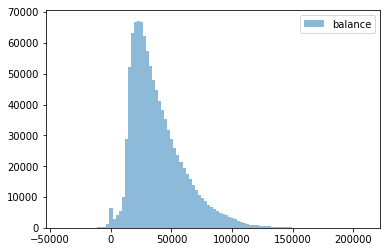

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D11FECE710>],
      dtype=object)

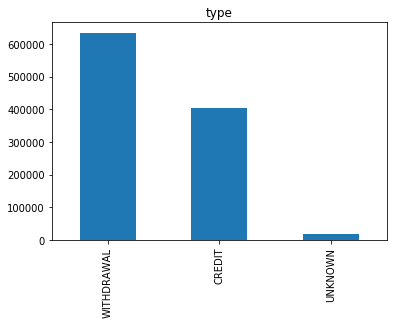

In [8]:
# Balance after transactions is rarely below 0
histogram(trans_df, 'balance', 100)

# There are more cash withdrawals than credits
trans_df['type'].value_counts().plot(kind='bar', subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D11FF6BA58>],
      dtype=object)

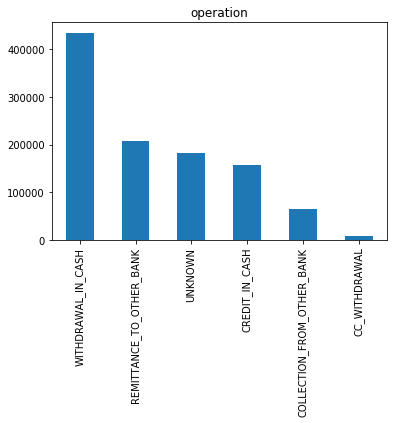

In [9]:
# There are mostly withdrawals in cash and remitance to other banks. Unknown operations should be removed
trans_df['operation'].value_counts().plot(kind='bar', subplots=True)

In [10]:
trans_df['year'] = [d.year for d in trans_df.date]
trans_df['month'] = [d.strftime('%b') for d in trans_df.date]

# Check if all years are present
years = trans_df['year'].unique()
print(years)

[1993 1994 1995 1996 1997 1998]


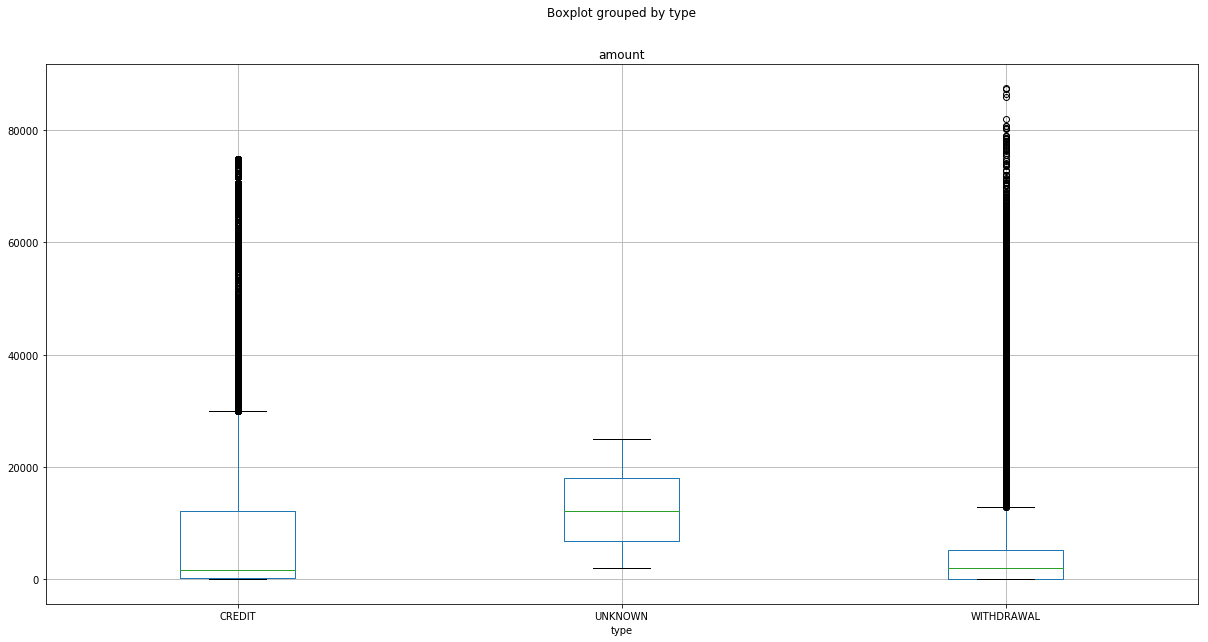

In [11]:
# Unknown withdrawal and credit transaction types are quite different in nature. Both display seasonality patters 
#but withdrawals are more highly skewed and less predictable. 

boxplot(trans_df, ['amount'], by='type')

In [12]:
# The outliers for amounts seem to be univariate. Therefore, we should keep them, but we should not rely on the average 
#(skewness too high)

#print(trans_df.amount[trans_df['type'] == 'CREDIT'].quantile(0.90))
print(trans_df.amount[trans_df['type'] == 'WITHDRAWAL'].quantile(0.90))
print(trans_df.amount[trans_df['type'] == 'WITHDRAWAL'].quantile(0.75))
print(trans_df['amount'].skew())

# 50% of withdrawals are done with sums lower than 6000

11601.0
5200.0
2.5906440655913787


In [13]:
# Keep only "Withdrawals in cash"

trans_df = trans_df[trans_df['type'] == 'WITHDRAWAL']
trans_df = trans_df[trans_df['operation'] == 'WITHDRAWAL_IN_CASH']

In [14]:
# perform GroupBy operation over daily frequency
train = trans_df.groupby('date', as_index=False).agg({"amount": "sum"})

# perform GroupBy operation over monthly frequency
train['month_year'] = pd.to_datetime(train['date']).dt.to_period('M')
train.set_index('date',inplace=True)

train.head()

,amount,month_year
date,,
1993-01-31,34700.0,1993-01
1993-02-03,25300.0,1993-02
1993-02-06,1600.0,1993-02
1993-02-07,14100.0,1993-02
1993-02-08,1500.0,1993-02


In [15]:
train_month = train.groupby('month_year')['amount'].sum().reset_index()
train_month['year'] = [d.year for d in train_month.month_year]
train_month['month'] = [d.strftime('%m') for d in train_month.month_year]
del train_month['month_year']
train_month['dateInt']= train_month['year'].astype(str) + "-" + train_month['month'].astype(str).str.zfill(2) + "-" + '1'
train_month['date'] = train_month['dateInt'].astype('datetime64')
del train_month['dateInt']

train_month.head()


,amount,year,month,date
0,34700.0,1993,01,1993-01-01
1,271814.6,1993,02,1993-02-01
2,828159.2,1993,03,1993-03-01
3,1986576.0,1993,04,1993-04-01
4,3767400.0,1993,05,1993-05-01


In [16]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.amount, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items(): dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(train_month)

#Obs: test statistic > critical value 
#Conclusion: timeseries not stationary

Results of Dickey-Fuller Test:
Test Statistic                 -0.959270
p-value                         0.767828
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [17]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries.amount, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)' %key] = value
    print (kpss_output)
    
kpss_test(train_month)

#KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict stationary

Results of KPSS Test:
Test Statistic            0.645746
p-value                   0.018478
Lags Used                12.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


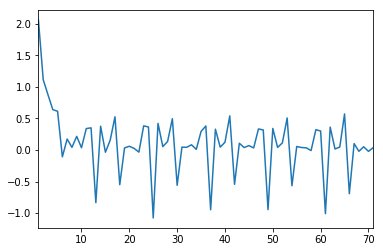

In [18]:
#Make it stationary with log differencing
train_month['amount_log'] = np.log(train_month['amount'])
train_month['amount_log_diff'] = train_month['amount_log'] - train_month['amount_log'].shift(1)
train_month['amount_log_diff'].dropna().plot()

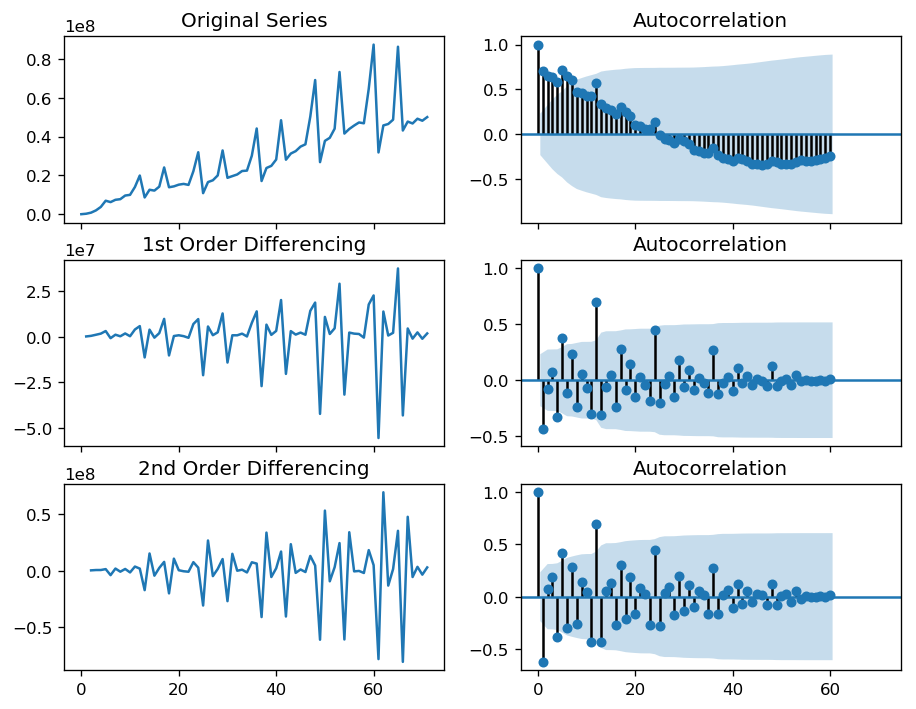

In [22]:
# Different way of doing it

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train_month.amount); axes[0, 0].set_title('Original Series')
plot_acf(train_month.amount, ax=axes[0, 1], lags=60)

# 1st Differencing
axes[1, 0].plot(train_month.amount.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_month.amount.diff().dropna(), ax=axes[1, 1], lags=60)

# 2nd Differencing
axes[2, 0].plot(train_month.amount.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_month.amount.diff().diff().dropna(), ax=axes[2, 1], lags=60)

plt.show()

#We only need 1 level of differencing. The values tend to degrade to zero quickly for stationary time series 
#while for non-stationary data the degradation will happen more slowly 

In [24]:
train.reset_index(inplace=True)
train.head()

,date,amount,month_year
0,1993-01-31,34700.0,1993-01
1,1993-02-03,25300.0,1993-02
2,1993-02-06,1600.0,1993-02
3,1993-02-07,14100.0,1993-02
4,1993-02-08,1500.0,1993-02


In [25]:
train_month.head()

,amount,year,month,date,amount_log,amount_log_diff
0,34700.0,1993,01,1993-01-01,10.454495,NaN
1,271814.6,1993,02,1993-02-01,12.512875,2.058381
2,828159.2,1993,03,1993-03-01,13.626961,1.114085
3,1986576.0,1993,04,1993-04-01,14.501923,0.874962
4,3767400.0,1993,05,1993-05-01,15.141896,0.639973


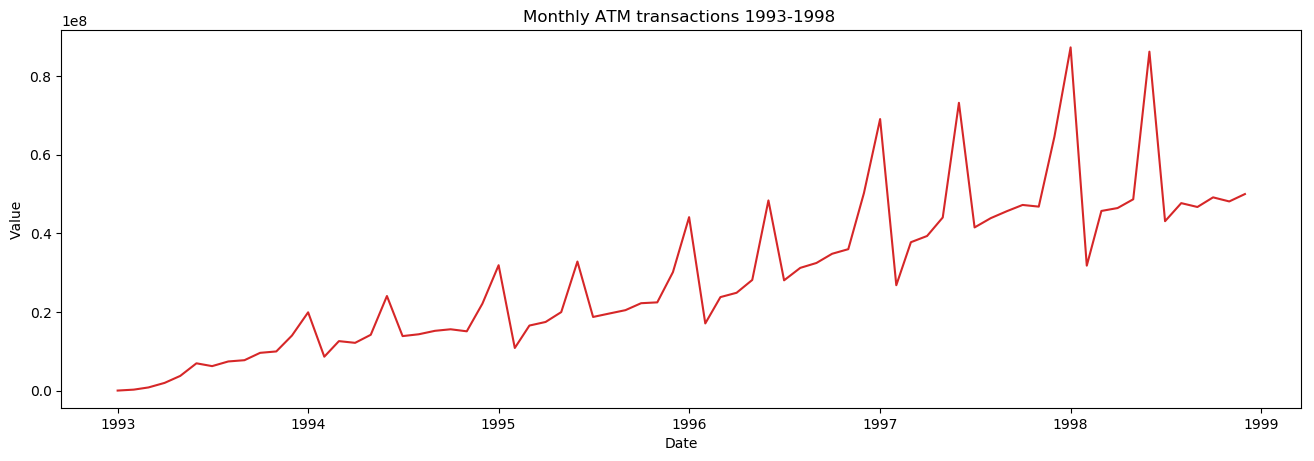

In [26]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_month, x=train_month.date, y=train_month.amount, title='Monthly ATM transactions 1993-1998 ')    

In [27]:
train.info()
years = train_month['year'].unique()
print(years)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 3 columns):
date          2144 non-null datetime64[ns]
amount        2144 non-null float64
month_year    2144 non-null period[M]
dtypes: datetime64[ns](1), float64(1), period[M](1)
memory usage: 50.3 KB
[1993 1994 1995 1996 1997 1998]


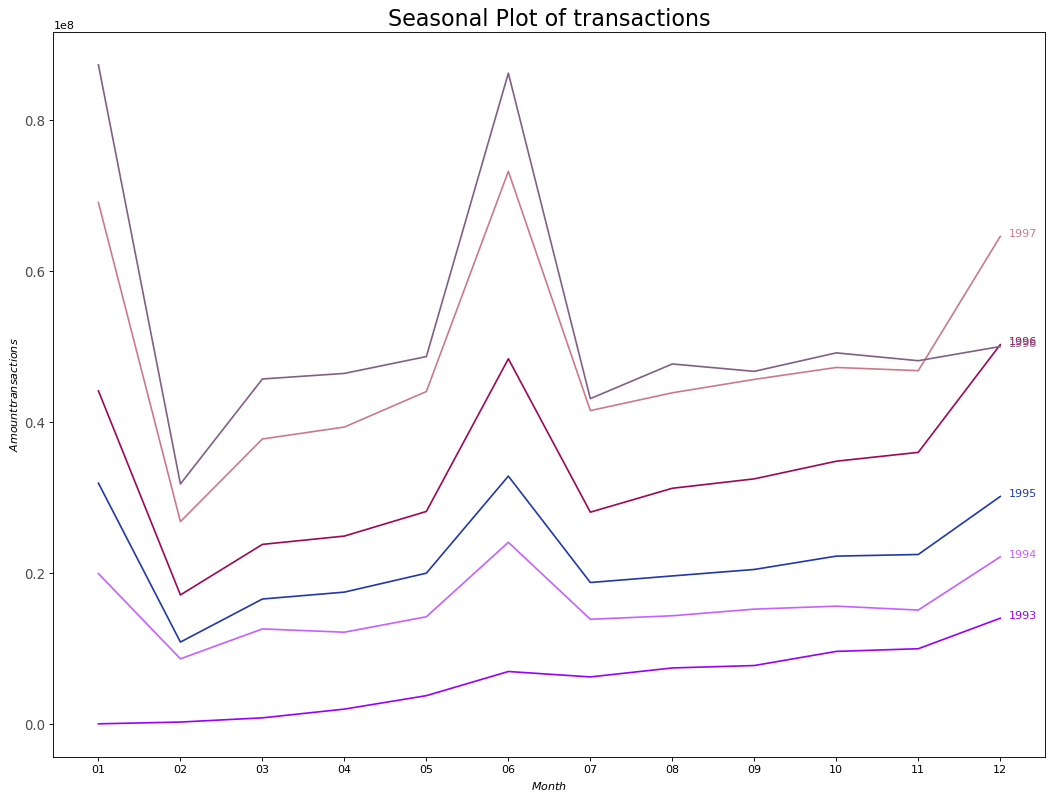

In [28]:
# Prepare data
years = train_month['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i >= 0:        
        plt.plot('month', 'amount', data=train_month.loc[train_month.year==y, :], color=mycolors[i], label=y)
        plt.text(train_month.loc[train_month.year==y, :].shape[0]-.9, train_month.loc[train_month.year==y, 'amount'][-1:].values[0], y, fontsize=10, color=mycolors[i])

# Decoration
plt.gca().set(ylabel='$Amount   transactions$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of transactions", fontsize=20)
plt.show()

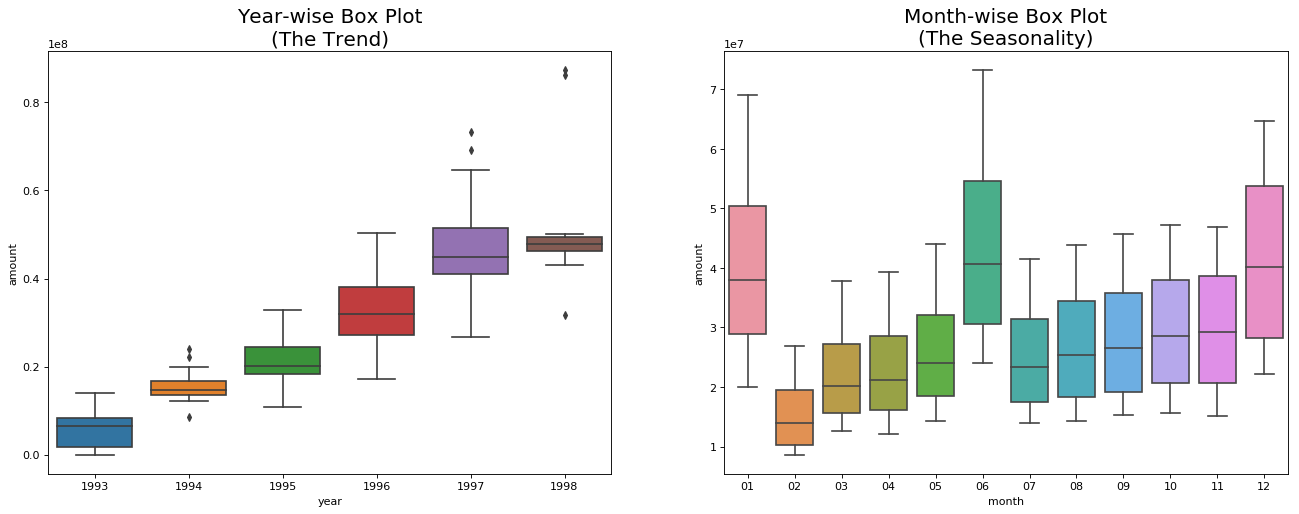

In [29]:
# Prepare data
years = train_month['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='amount', data=train_month, ax=axes[0])
sns.boxplot(x='month', y='amount', data=train_month.loc[~train_month.year.isin([1993, 1998]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()


In [30]:
# Keep trans_df for db upload

trans_df.to_csv('clean/trans_df.csv')

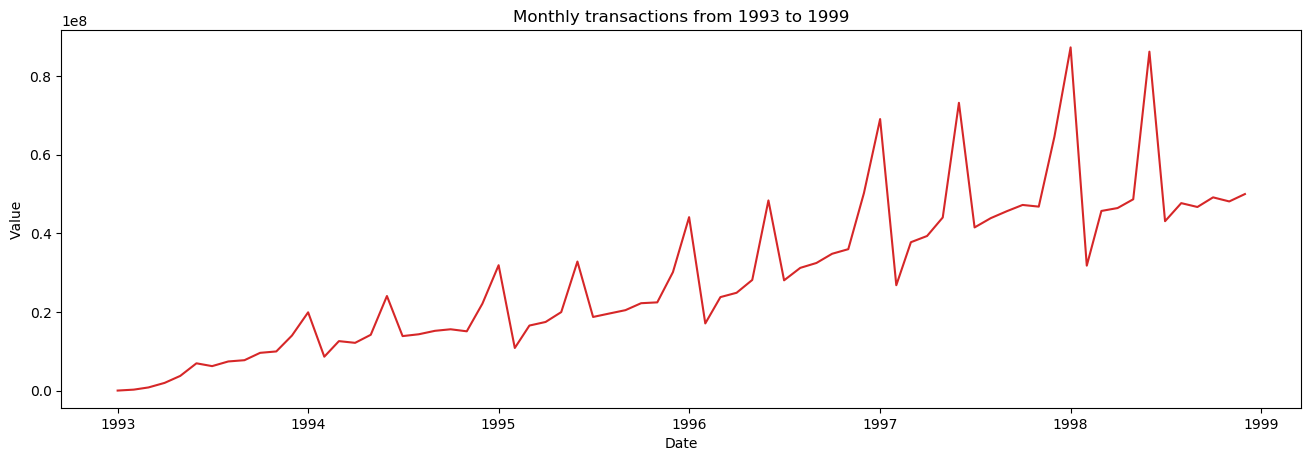

In [31]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_month, x=train_month.date, y=train_month.amount, title='Monthly transactions from 1993 to 1999')  

In [45]:
train_month_drop = train_month[train_month.year == 1998]
train_month.drop(train_month_drop.index, inplace=True)
train_month.tail()

,amount,year,month,date,amount_log,amount_log_diff
55,43887795.5,1997,08,1997-08-01,17.597147,0.055276
56,45663585.4,1997,09,1997-09-01,17.636812,0.039665
57,47242534.5,1997,10,1997-10-01,17.670805,0.033993
58,46818701.6,1997,11,1997-11-01,17.661793,-0.009012
59,64603111.0,1997,12,1997-12-01,17.983773,0.321980


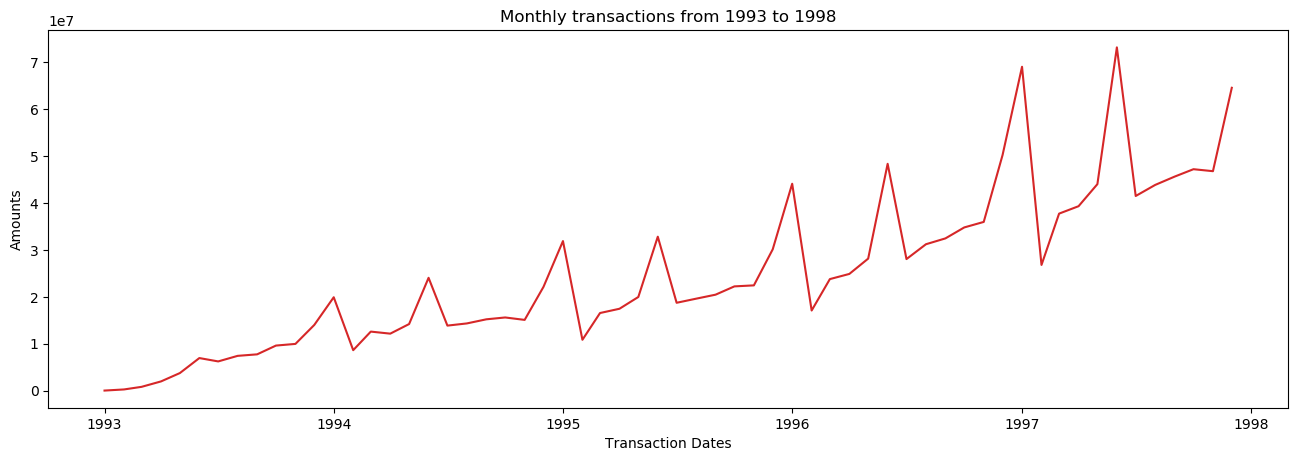

In [47]:
def plot_df(df, x, y, title="", xlabel='Transaction Dates', ylabel='Amounts', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(train_month, x=train_month.date, y=train_month.amount, title='Monthly transactions from 1993 to 1998') 